In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 38.7MB/s]
100% 1.06G/1.06G [00:29<00:00, 39.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 90ms/step - loss: 0.6198 - accuracy: 0.6528 - val_loss: 0.5307 - val_accuracy: 0.7308
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4803 - accuracy: 0.7683 - val_loss: 0.4731 - val_accuracy: 0.7712
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3749 - accuracy: 0.8331 - val_loss: 0.4643 - val_accuracy: 0.7998
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2413 - accuracy: 0.8986 - val_loss: 0.6961 - val_accuracy: 0.7930
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1293 - accuracy: 0.9517 - val_loss: 0.9265 - val_accuracy: 0.7800
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0777 - accuracy: 0.9726 - val_loss: 0.9548 - val_accuracy: 0.7822
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0599 - accuracy: 0.9792 - val_loss: 1.2721 - val_accuracy:

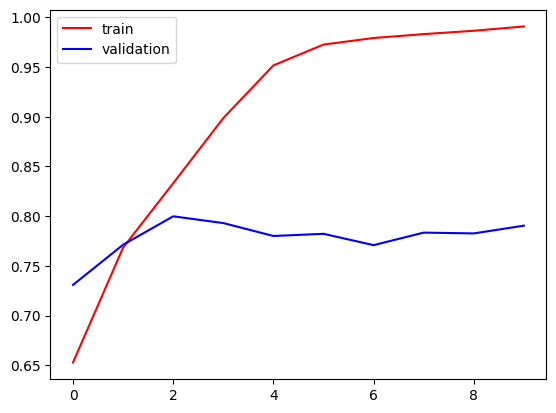

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

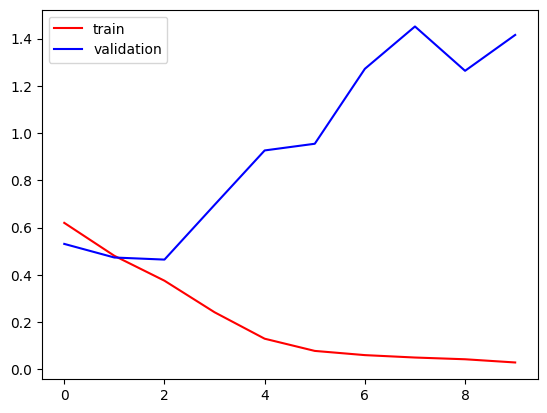

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

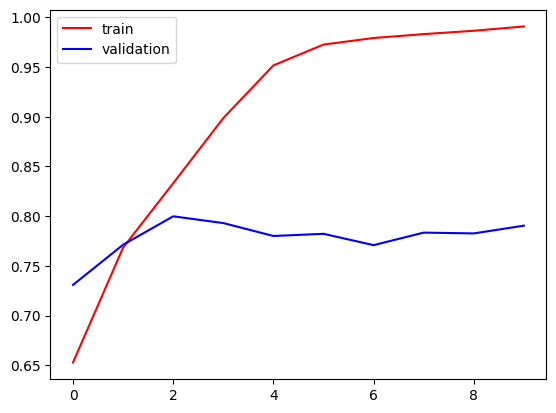

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

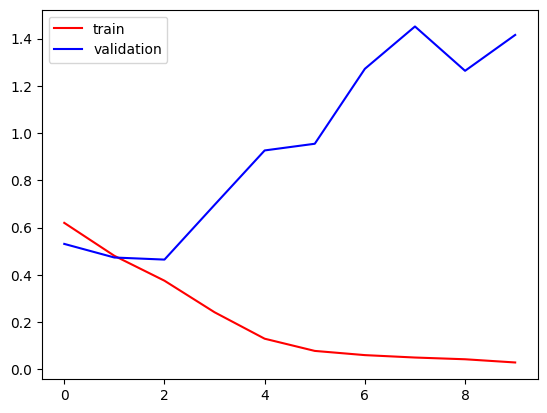

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

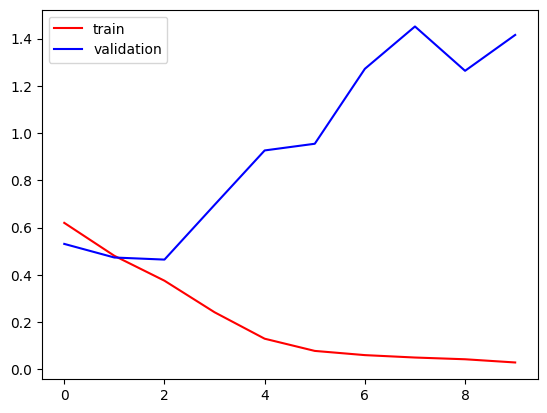

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
# import cv2
# test_img = cv2.imread('/content/cat.jpg')
# plt.imshow(test_img)
# test_img.shape

In [ ]:
# test_img = cv2.resize(test_img,(256,256))
# test_input = test_img.reshape((1,256,256,3))
# model.predict(test_input)

In [ ]:
# create CNN model

model1 = Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.5187 - accuracy: 0.5725 - val_loss: 0.6137 - val_accuracy: 0.6692
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5750 - accuracy: 0.6983 - val_loss: 0.5322 - val_accuracy: 0.7388
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4855 - accuracy: 0.7677 - val_loss: 0.4741 - val_accuracy: 0.7728
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4186 - accuracy: 0.8090 - val_loss: 0.4996 - val_accuracy: 0.7734
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4224 - accuracy: 0.8159 - val_loss: 0.5962 - val_accuracy: 0.6430
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3199 - accuracy: 0.8644 - val_loss: 0.4297 - val_accuracy: 0.8100
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2451 - accuracy: 0.8988 - val_loss: 0.4270 - val_ac

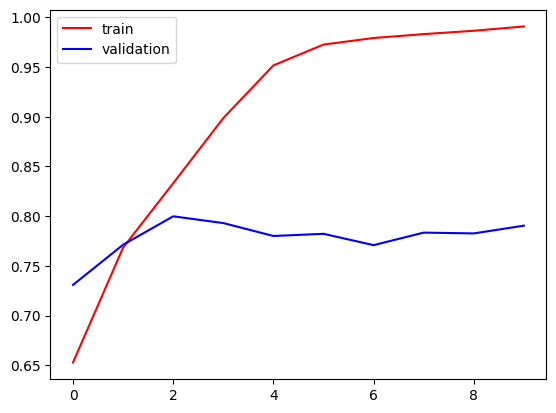

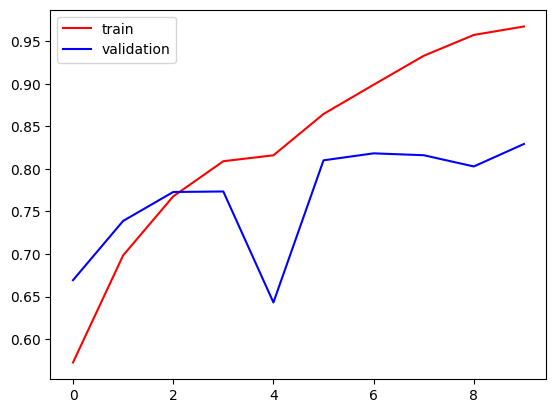

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

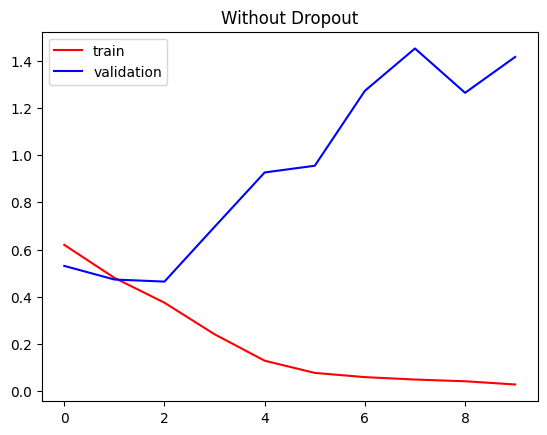

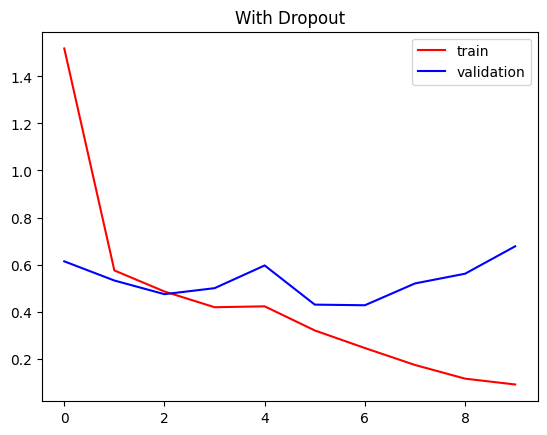

In [ ]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('Without Dropout')
plt.show()

plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout')
plt.show()


In [ ]:
from keras import regularizers
# create CNN model

model2 = Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Flatten())

#model1.add(Dense(128,activation='relu'))
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.1))

#model1.add(Dense(64,activation='relu'))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.1))

model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 3.8144 - accuracy: 0.6132 - val_loss: 1.6151 - val_accuracy: 0.6810
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 1.2937 - accuracy: 0.7173 - val_loss: 1.2397 - val_accuracy: 0.7118
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 1.0984 - accuracy: 0.7493 - val_loss: 0.9289 - val_accuracy: 0.7362
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.9820 - accuracy: 0.7765 - val_loss: 0.9453 - val_accuracy: 0.7224
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.9204 - accuracy: 0.7960 - val_loss: 1.0274 - val_accuracy: 0.6904
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.9514 - accuracy: 0.8117 - val_loss: 0.9393 - val_accuracy: 0.7864
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.8947 - accuracy: 0.8345 - val_loss: 1.0173 - val_ac

In [ ]:
import matplotlib.pyplot as plt


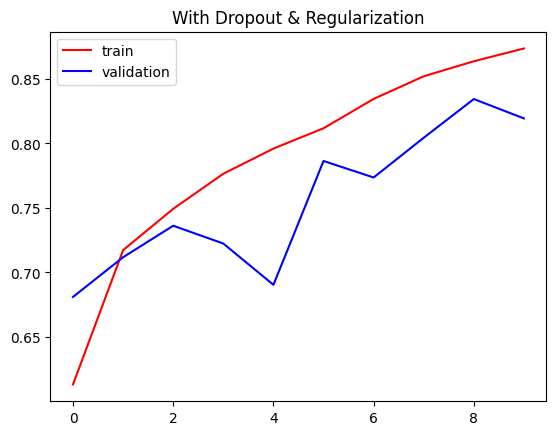

In [ ]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & Regularization')
plt.show()

In [ ]:
import pickle

# Load the model from the file
with open('model2.pickle', 'wb') as file:
    pickle.dump(model2, file)

model2.save('model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save('model2.keras')

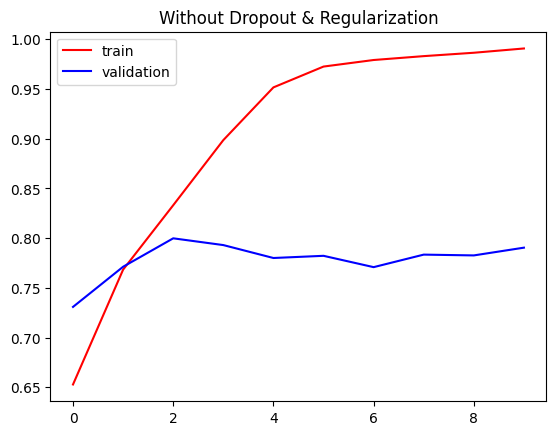

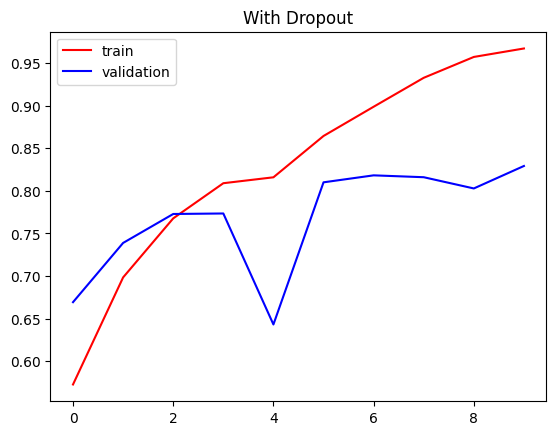

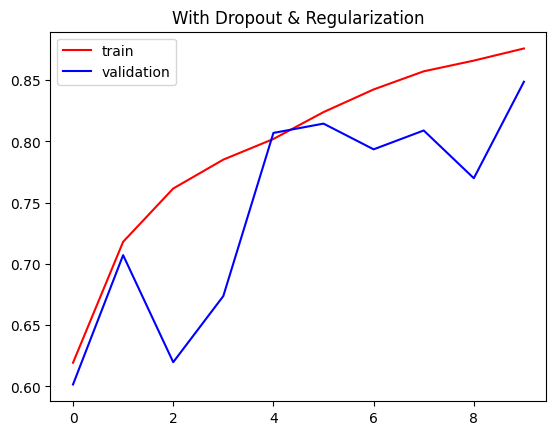

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('Without Dropout & Regularization')
plt.show()

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout')
plt.show()

plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & Regularization')
plt.show()

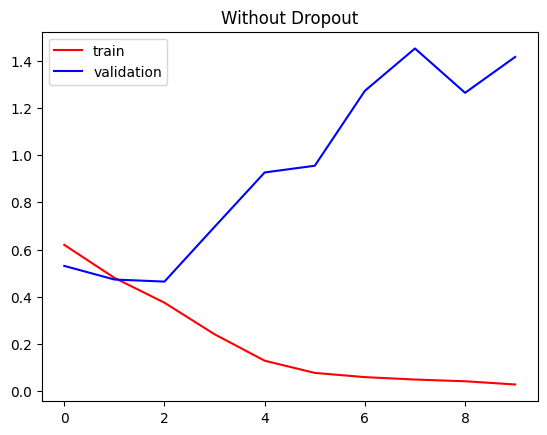

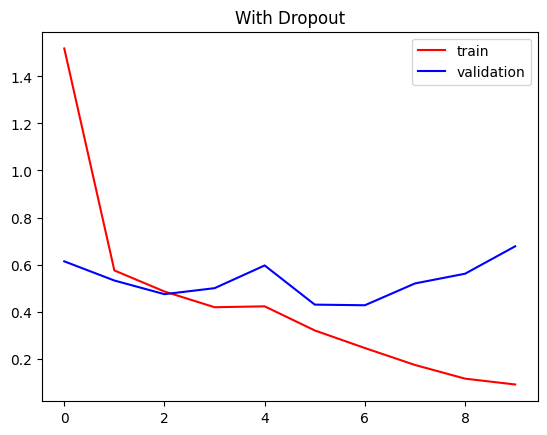

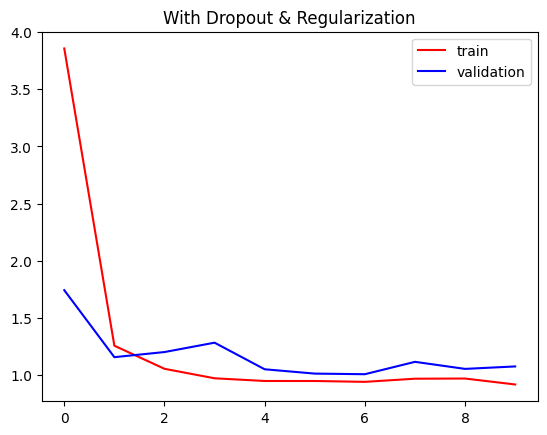

In [ ]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('Without Dropout')
plt.show()

plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout')
plt.show()

plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & Regularization')
plt.show()


In [ ]:
from keras import regularizers
# create CNN model

model3 = Sequential()

model3.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Flatten())

#model1.add(Dense(128,activation='relu'))
model3.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dropout(0.1))

#model1.add(Dense(64,activation='relu'))
model3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dropout(0.1))

model3.add(Dense(1,activation='sigmoid'))

In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 29.9508 - accuracy: 0.5868 - val_loss: 17.8487 - val_accuracy: 0.5986
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 16.9592 - accuracy: 0.6187 - val_loss: 16.6752 - val_accuracy: 0.5156
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 16.5963 - accuracy: 0.6410 - val_loss: 16.6042 - val_accuracy: 0.6538
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 16.6973 - accuracy: 0.6723 - val_loss: 16.8095 - val_accuracy: 0.6076
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 16.8120 - accuracy: 0.6946 - val_loss: 17.0099 - val_accuracy: 0.6330
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 17.0110 - accuracy: 0.7316 - val_loss: 17.2120 - val_accuracy: 0.6678
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 17.0590 - accuracy: 0.7541 - val_loss: 17

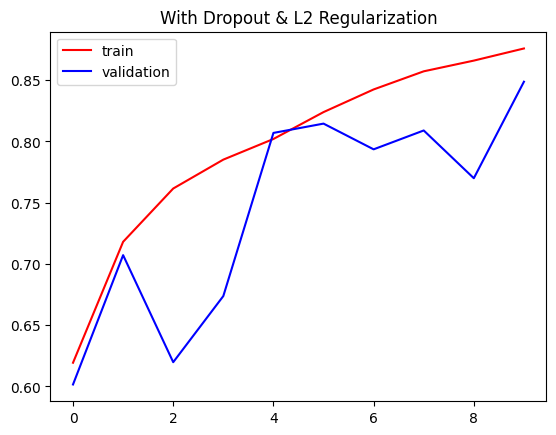

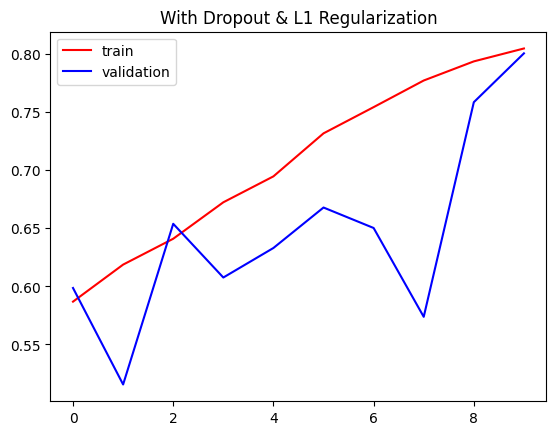

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & L2 Regularization')
plt.show()

plt.plot(history3.history['accuracy'],color='red',label='train')
plt.plot(history3.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & L1 Regularization')
plt.show()

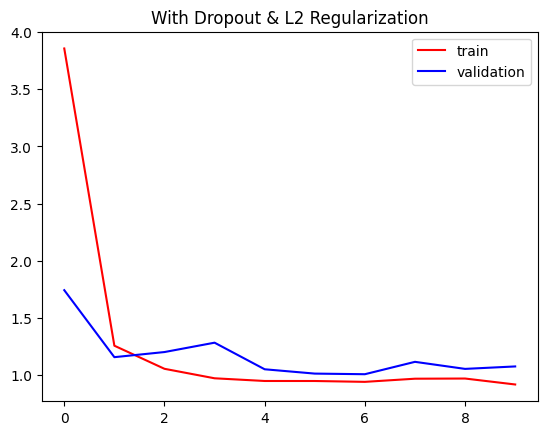

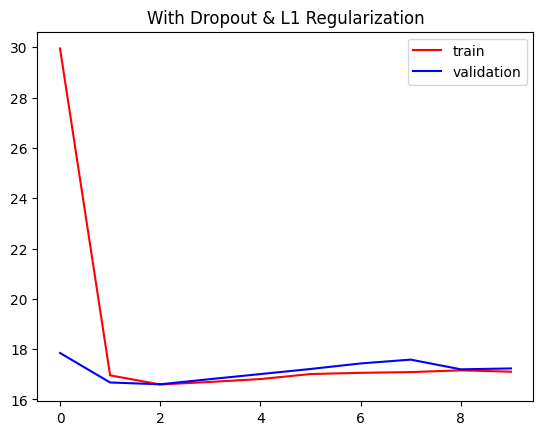

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & L2 Regularization')
plt.show()

plt.plot(history3.history['loss'],color='red',label='train')
plt.plot(history3.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('With Dropout & L1 Regularization')
plt.show()